In [1]:
import pandas as pd
data = pd.read_csv("seattleWeather_1948-2017.csv")
data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [6]:
data.corr()

,PRCP,TMAX,TMIN
PRCP,1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860684
TMIN,-0.064365,0.860684,1.000000


In [8]:
data.head(5)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


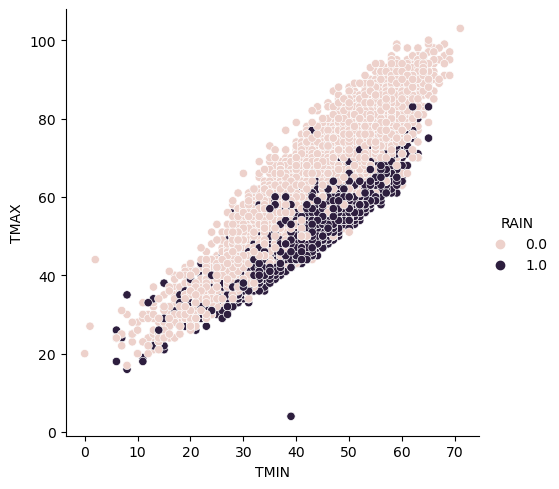

In [16]:
# plot precipitation and tmax with hue of rain in seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with columns 'precipitation', 'tmax', and 'rain'
sns.relplot(x='TMIN', y='TMAX', hue='RAIN', data=data)
plt.show()

In [20]:
data.RAIN.unique()

array([True, False], dtype=object)

In [21]:
# make a mode whcih will predict if it will rain ot not based on prcp TMAX and TMIN
# angela ? can you hear me ?

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Remove rows with missing values
data.dropna(inplace=True)

# Feature selection
X = data[['PRCP', 'TMAX', 'TMIN']]
y = data['RAIN'].astype(int) # 'rain' should be 0 or 1 indicating no rain or rain

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2953
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110



In [27]:
model.predict([[0.03,33, 34]])

/Users/angelasthingy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])